In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = sm.datasets.anes96.load_pandas().data
cols = [col for col in df.columns.tolist() if col != 'logpopul']
df[cols] = df[cols].astype(np.int64)
df.head()

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,educ,income,vote,logpopul
0,0,7,7,1,6,6,36,3,1,1,-2.302585
1,190,1,3,3,5,1,20,4,1,0,5.247550
2,31,7,2,2,6,1,24,6,1,0,3.437208
3,83,4,3,4,5,1,28,6,1,0,4.420045
4,640,7,5,6,4,0,68,6,1,0,6.461624


## Barchart using pandas

In [198]:
def draw_barchart(df, ax=None, sort=False, horizon=False, legend=False, **kwargs):
    """Customized bar chart
    
    Parameters
    ----------
    'edgecolor' : string default "dict"
    """
    
    plot_args = {'edgecolor': 'black', 'linewidth': 0.7, 'width': 0.8, 'colormap': None}
    legend_args = {'loc': 'best', 'ncol': 1, 'borderpad': 0.8, 'prop': {'size': 8}}
    tick_args = {'axis': 'x', 'rotation': None}
    
    if kwargs:
        for key, value in kwargs['kwargs'].items():
            if key in plot_args.keys():
                plot_args[key] = value
                
            elif key in legend_args.keys():
                legend_args[key] = value
                
            elif key in tick_args.keys():
                tick_args[key] = value

    if horizon:
        horizon = 'barh'
        axis = 'x'
    else:
        horizon = 'bar'
        axis = 'y'

    if sort:
        temp.sort_index(inplace=True)
        
    lgd_lw = plot_args.get('linewidth')
    temp.plot(kind=horizon, ax=ax, **plot_args)
    ax.set_axisbelow(True)
    ax.grid(axis=axis, linestyle='--')
       
    if legend:
        lgd = ax.legend(frameon=True, framealpha=1, shadow=False, fancybox=False,  
                        edgecolor='black', **legend_args)
        lgd.get_frame().set_linewidth(lgd_lw)
    ax.tick_params(axis=tick_args.pop('axis'), **tick_args)
    
    return ax

In [199]:
temp = df['TVnews'].value_counts()
temp

7    288
0    161
2    112
3    101
1    100
5     84
4     66
6     32
Name: TVnews, dtype: int64

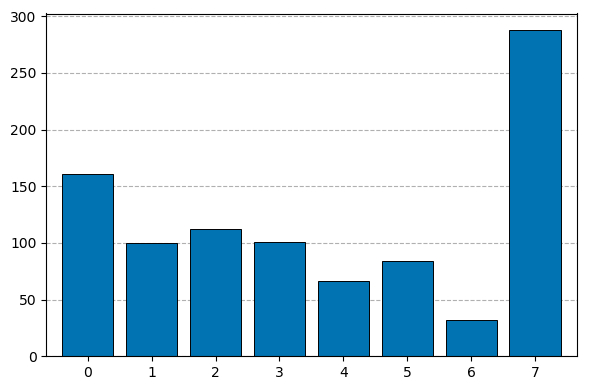

In [200]:
sns.set_palette('colorblind')

fig = plt.figure(dpi=100)
ax = plt.axes()

draw_barchart(df, ax=ax, sort=True, horizon=False, kwargs={'edgecolor': 'black', 'width': 0.8, 'rotation': 0})
fig.tight_layout()
plt.show()

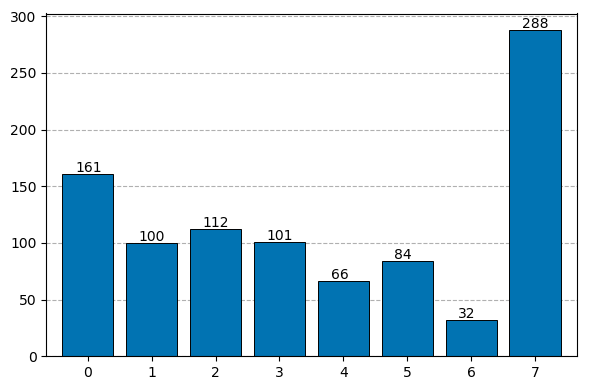

In [201]:
fig = plt.figure(dpi=100)
ax = plt.axes()

draw_barchart(df, ax=ax, sort=True, horizon=False, kwargs={'edgecolor': 'black', 'width': 0.8, 'rotation': 0})

# Add labels
for p in ax.patches:
    height = p.get_height()
    x = p.get_x()
    ax.text(x=x+0.2, y=height+2, s=f'{height}', fontsize=10)
    
fig.tight_layout()
plt.show()

In [202]:
temp = df.pivot_table(values='TVnews', index='PID', columns='vote', aggfunc='count')
temp

vote,0,1
PID,,
0,197,3
1,169,11
2,101,7
3,26,11
4,24,70
5,26,124
6,8,167


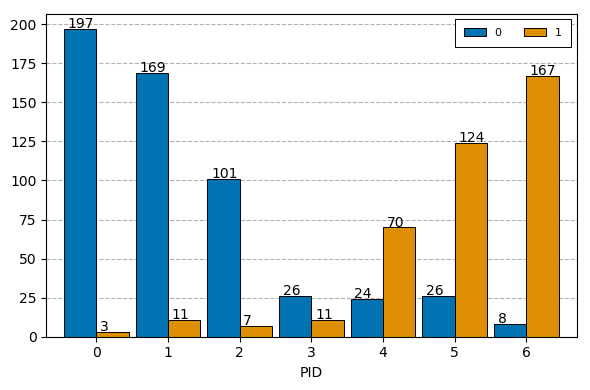

In [239]:
fig = plt.figure(dpi=100)
ax = plt.axes()

draw_barchart(df, ax=ax, sort=True, horizon=False, legend=True, kwargs={'linewidth': 0.7, 'ncol': 2, 'width': 0.9})

# Add labels
for p in ax.patches:
    height = p.get_height()
    x = p.get_x()
    ax.text(x=x+0.05, y=height+0.5, s=f'{height}', fontsize=10)

fig.tight_layout()
plt.show()

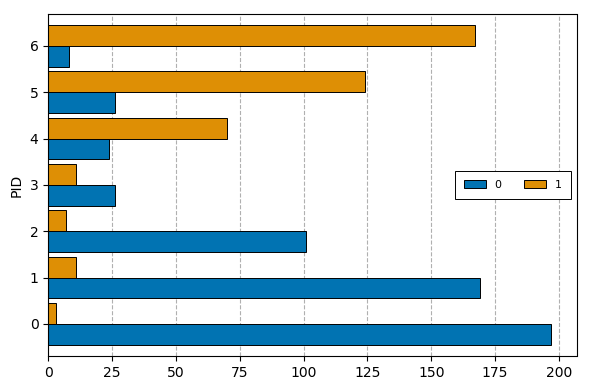

In [203]:
fig = plt.figure(dpi=100)
ax = plt.axes()

draw_barchart(df, ax=ax, sort=True, horizon=True, legend=True, kwargs={'linewidth': 0.7, 'ncol': 2, 'width': 0.9})
fig.tight_layout()
plt.show()

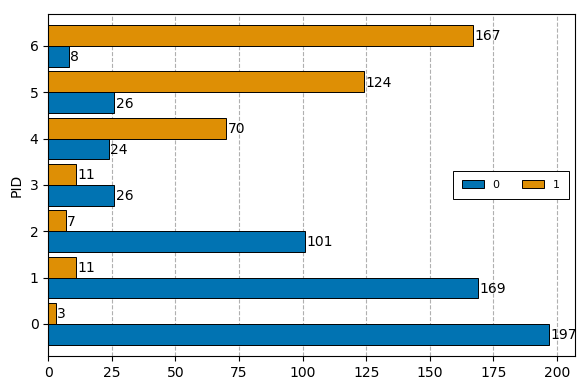

In [231]:
fig = plt.figure(dpi=100)
ax = plt.axes()

draw_barchart(df, ax=ax, sort=True, horizon=True, legend=True, kwargs={'linewidth': 0.7, 'ncol': 2, 'width': 0.9})

# Add labels
for p in ax.patches:
    width = p.get_width()
    y = p.get_y()
    ax.text(x=width+0.5, y=y+0.12, s=f'{width}', ha='left', fontsize=10)

fig.tight_layout()
plt.show()

In [52]:
def draw_boxplot(df, x, y, hue=None, col=None, ax=None, **kwargs):
    plot_args = {'linewidth': 1.2, 'width': 0.8}
    legend_args = {'loc': 'best', 'ncol': 1, 'borderpad': 0.8, 'prop': {'size': 8}}
    
    if kwargs:
        for key, value in kwargs['kwargs'].items():
            if key in plot_args.keys():
                plot_args[key] = value
                
            elif key in legend_args.keys():
                legend_args[key] = value
                
            elif key in tick_args.keys():
                tick_args[key] = value
       
    legend = False
    if hue:
        legend = True
    
    lgd_lw = plot_args.get('linewidth') * 0.7
    sns.boxplot(x=x, y=y, hue=hue, data=df, saturation=1, 
                linewidth=plot_args.pop('linewidth'), ax=ax, **plot_args)
    ax.set_axisbelow(True)
    ax.grid(axis='y', linestyle='--')

    if legend:
        lgd = ax.legend(frameon=True, framealpha=1, shadow=False, fancybox=False,  
                        edgecolor='black', **legend_args)
        lgd.get_frame().set_linewidth(lgd_lw)

    return ax

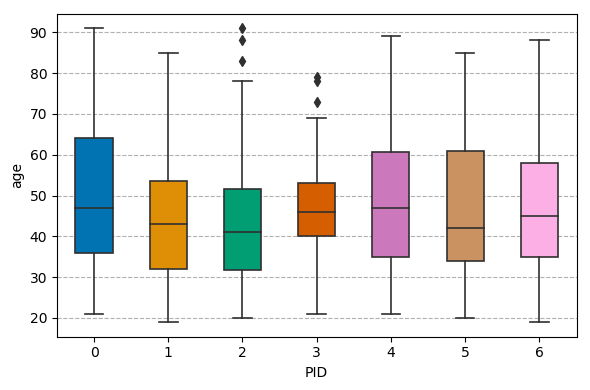

In [240]:
fig = plt.figure(dpi=100)
ax = plt.axes()

draw_boxplot(df, x='PID', y='age', ax=ax, kwargs={'width': 0.5})
fig.tight_layout()
plt.show()

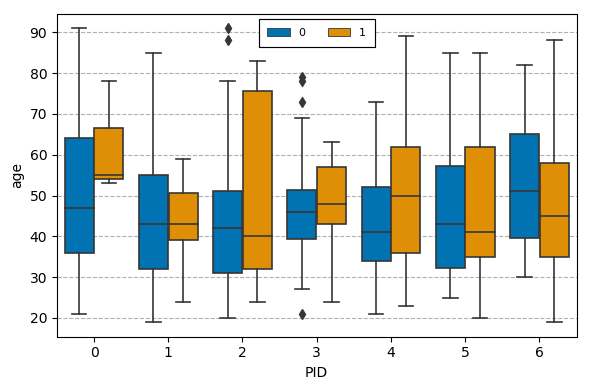

In [8]:
fig = plt.figure(dpi=100)
ax = plt.axes()

draw_boxplot(df, x='PID', y='age', hue='vote', ax=ax, kwargs={'ncol': 2})
fig.tight_layout()
plt.show()

In [9]:
import itertools
from sklearn.metrics import confusion_matrix

def draw_confusion_matrix(y_true, y_pred, ax=None):
    """draw_confusion_matrix
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    cm = confusion_matrix(y_true, y_pred)
    normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    im = ax.imshow(normalized_cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, fraction=0.025, ax=ax)
    
    classes = ['C{}'.format(c+1) for c in range(len(cm))]
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i+0.05, '{}\n({:.2f})'.format(cm[i, j], normalized_cm[i,j]), 
                horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
    ax.set_ylabel('True classes')
    ax.set_xlabel('Predicted classes')
    
    return ax

In [10]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

data = load_iris()

clf = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=1000).fit(data.data, data.target)
y_pred = clf.predict(data.data)

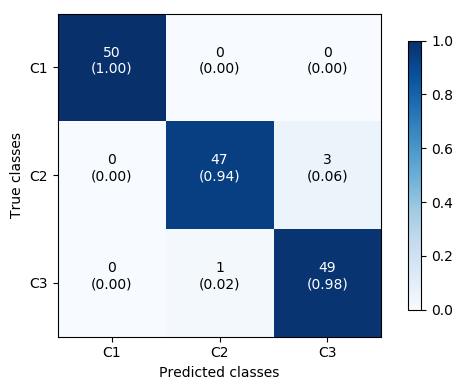

In [11]:
fig = plt.figure(dpi=100)
ax = plt.axes()

draw_confusion_matrix(data.target, y_pred, ax=ax)
fig.tight_layout()
plt.show()
# fig.savefig('confusion.png', bbox_inches='tight')